In [1]:
from ase import Atoms
from clusterx.parent_lattice import ParentLattice
from clusterx.visualization import juview
from clusterx.clusters.clusters_pool import ClustersPool
from clusterx.correlations import CorrelationsCalculator
import math
from clusterx.symmetry import get_spacegroup
from clusterx.super_cell import SuperCell
import numpy as np
from ase.build import bulk, make_supercell
import clusterx.utils as clutils
from ase.visualize import view

r = math.sqrt(0.5**2 + 0.5**2 + 0.5**2)
print(r)
# dict_colors = {'Ta':'salmon','V':'mediumseagreen','W':'goldenrod'}
# dict_colors_selected = {'Ta':'darksalmon','V':'seagreen','W':'darkgoldenrod'}
dict_colors = {'Ir':'salmon','Ru':'mediumseagreen',}
dict_colors_selected = {'Ir':'darksalmon','Ru':'seagreen'}

0.8660254037844386


In [308]:
np.sqrt(8/3)

1.632993161855452

In [2]:
from clusterx.super_cell import SuperCell
a=2.5
pri = Atoms(scaled_positions=[[0,0,0],[1/3, 2/3, 1/2]],cell=[[1.0,0,0],[-0.5,np.sqrt(3)/2,0.0],[0,0,np.sqrt(8/3)]],pbc=(1,1,1))
plat = ParentLattice(pri,site_symbols=[['Ir','Ru'],['Ir','Ru']])

In [3]:
cpool = ClustersPool(plat, npoints=[0,1,2,3,4],radii=[0,0,1.0,1.0,1.0])

In [4]:
print("Number of clusters: ", len(cpool))
print("Multiplicities: ", cpool.get_multiplicities())
cpool.write_clusters_db()
cpool.display_info()

Number of clusters:  8
Multiplicities:  [ 1  2  6  6 12  2  2  4]

+-----------------------------------------------------------+
|                   Clusters Pool Info                      |
+-----------------------------------------------------------+
|       Index       |   Nr. of points   |      Radius       |
+-----------------------------------------------------------+
|         0         |         0         |       0.000       |
|         1         |         1         |       0.000       |
|         2         |         2         |       1.000       |
|         3         |         2         |       1.000       |
|         4         |         3         |       1.000       |
|         5         |         3         |       1.000       |
|         6         |         3         |       1.000       |
|         7         |         4         |       1.000       |
+-----------------------------------------------------------+



In [55]:
cluster_orbit, cluster_multiplicity = cpool.get_cluster_orbit(cluster_index = 3)

print("There are ",len(cluster_orbit),"symmetrically equivalent representations of the cluster in the supercell.")
print("The cluster multiplicity is ",cluster_multiplicity,".")

/home/sayan/.local/lib/python3.8/site-packages/clusterx/clusters/clusters_pool.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(atom_idxs), np.array(atom_nrs)


There are  216 symmetrically equivalent representations of the cluster in the supercell.
The cluster multiplicity is  8 .


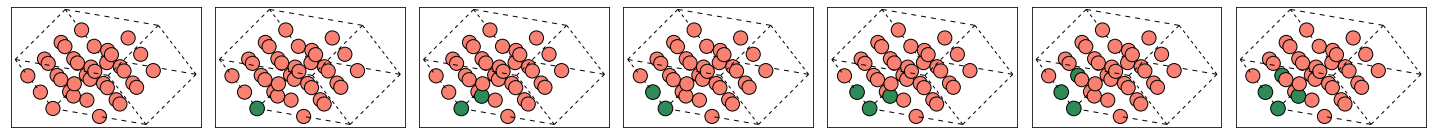

In [6]:
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,7,figsize=(20,2))
axarr = axs.flatten()
plt.setp(axarr, xticks=[], yticks=[])
plt_idx = 0
for index, clus in enumerate(cpool.get_cpool_atoms()):
    colors = []
    if index == 6:
        continue
    for index2, element in enumerate(clus.get_chemical_symbols()):
        if index2 in cpool.get_cpool_dict()['atom_indexes'][index]:
            colors.append(dict_colors_selected[element])
        else:
            colors.append(dict_colors[element])
    axarr[plt_idx].set_aspect('equal')
    plot_atoms(clus, axarr[plt_idx], radii=0.15, colors=colors,rotation=('45x,45y,45z'),)
    plt_idx += 1
fig.tight_layout()
plt.savefig('binary-clusters-hcp.pdf',dpi=300)
plt.show()

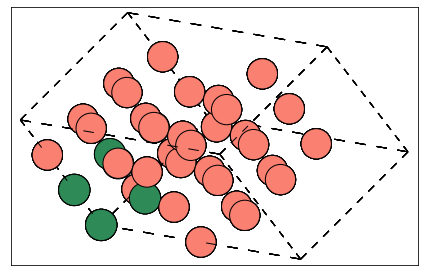

In [357]:
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt

ax = plt.gca()
plt.setp(ax, xticks=[], yticks=[])

for index, clus in enumerate(cpool.get_cpool_atoms()):
    
    colors = []
    for index2, element in enumerate(clus.get_chemical_symbols()):
        if index2 in cpool.get_cpool_dict()['atom_indexes'][index]:
            colors.append(dict_colors_selected[element])
        else:
            colors.append(dict_colors[element])
    ax.set_aspect('equal')
    plot_atoms(clus, plt.gca(), radii=0.15, colors=colors,rotation=('45x,45y,45z'),show_unit_cell=2)
    plt.tight_layout()
    plt.savefig(f'binary-clusters-hcp-{index}.svg',dpi=300)

In [5]:
corrcal = CorrelationsCalculator("binary-linear", plat, cpool)

In [5]:
corrs = corrcal.get_cluster_correlations(structure) # Compute correlations for structure
orbl = corrcal.get_orbit_lengths(structure) # Get orbit lengths in structure M_\alpha

print("{0:<19s}|{1:<19s}|{2:<19s}".format("Cluster index","Orbit length","Correlation"))
for i in range(len(cpool)):
    print("{0:<19d}|{1:<19d}|{2:<19.5f}".format(i, orbl[i], corrs[i]))

NameError: name 'structure' is not defined

ERROR! Session/line number was not unique in database. History logging moved to new session 22
